In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [24]:
X_train = pd.read_csv('/home/andrey/projects/abalone/datasets/X_train.csv')
X_test = pd.read_csv('/home/andrey/projects/abalone/datasets/X_test.csv')

In [25]:
y_train = pd.read_csv('/home/andrey/projects/abalone/datasets/y_train.csv',
                      header = None)
y_train = y_train[0]
y_test = pd.read_csv('/home/andrey/projects/abalone/datasets/y_test.csv',
                     header = None)
y_test = y_test[0]

In [26]:
params = {
    "loss": "squared_error",
    "learning_rate": 0.1,
    "n_estimators": 100,
    "min_samples_split": 2,
    "max_depth": 3,
    "random_state": 42  
}

In [27]:
reg = GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [28]:
mse = mean_squared_error(y_test, reg.predict(X_test))
print("MSE на тестовой выборке: {:.6f}".format(mse))

MSE на тестовой выборке: 5.075618


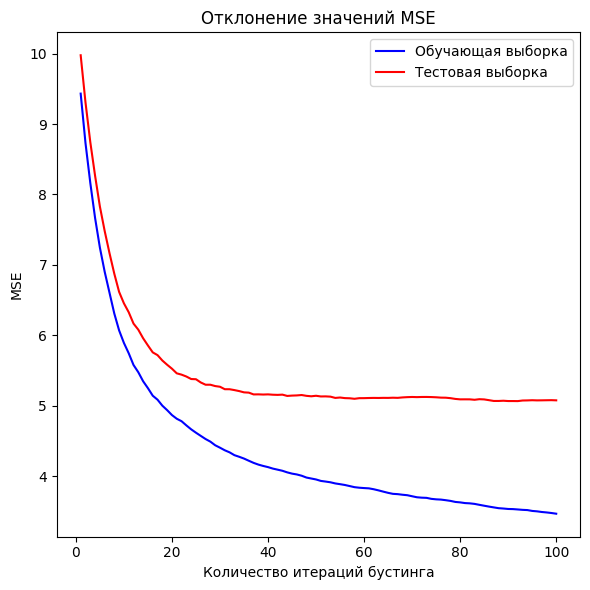

In [29]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Отклонение значений MSE")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Обучающая выборка",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    test_score,
    "r-",
    label="Тестовая выборка"
)
plt.legend(loc="upper right")
plt.xlabel("Количество итераций бустинга")
plt.ylabel("MSE")
fig.tight_layout()
plt.show()